In [1]:
import numpy as np

import matplotlib.pyplot as plt

import utils

import os

%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Input, Dropout,Flatten, Conv2D

from keras.layers import BatchNormalization, Activation, MaxPooling2D

from keras.models import Model, Sequential

from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from keras.utils import plot_model

from IPython.display import SVG, Image

import tensorflow as tf

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.4.1


In [2]:
import pandas as pd

In [3]:
for expression in os.listdir('D:/DATASET-20210424T052036Z-001/DATASET/TRAIN'):

    print(str(len(os.listdir('D:/DATASET-20210424T052036Z-001/DATASET/TRAIN/'+expression)))+" "+expression+'images')

100 Aimages
100 AAimages
100 AEimages
100 AIEimages
100 AUimages
100 Bimages
101 BHimages
101 Cimages
100 CHHimages
101 Dimages
100 DDimages
100 DHimages
102 DHHimages
100 DHNYimages
103 Eimages
103 EEimages
101 Fimages
102 Gimages
101 GHimages
102 Himages
104 Jimages
102 JHimages
101 Kimages
100 KHimages
101 KSHimages
101 Limages
104 LLimages
101 Mimages
103 Nimages
100 NNimages
101 Oimages
100 Pimages
101 Rimages
102 Simages
101 SHimages
101 Timages
100 THimages
103 THHimages
100 TTimages
101 Uimages
105 UUimages
100 Vimages
103 Yimages


In [4]:
img_size=64

batch_size=64

datagen_train=ImageDataGenerator(horizontal_flip=True)

train_generator=datagen_train.flow_from_directory('D:/DATASET-20210424T052036Z-001/DATASET/TRAIN',

                                                 target_size=(img_size,img_size),

                                                 color_mode='grayscale',

                                                 batch_size=batch_size,

                                                 class_mode='categorical',

                                                 shuffle=True)

datagen_validation=ImageDataGenerator(horizontal_flip=True)

validation_generator=datagen_train.flow_from_directory('D:/DATASET-20210424T052036Z-001/DATASET/TEST',

                                                 target_size=(img_size,img_size),

                                                 color_mode='grayscale',

                                                 batch_size=batch_size,

                                                 class_mode='categorical',

                                                 shuffle=True)

Found 4352 images belonging to 43 classes.
Found 1325 images belonging to 43 classes.


In [ ]:
model=Sequential()

#conv-1

model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,1)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#2 -conv layer

model.add(Conv2D(128,(5,5),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#3 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#4 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(512))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(43,activation='softmax'))

opt=Adam(lr=0.0005)

#lr-learning rate

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
ephocs=10

steps_per_epoch=train_generator.n//train_generator.batch_size

steps_per_epoch

validation_steps=validation_generator.n//validation_generator.batch_size

validation_steps

history=model.fit(

    x=train_generator,

    steps_per_epoch=steps_per_epoch,

    epochs=ephocs,

    validation_data=validation_generator,

    validation_steps=validation_steps,

 #   callbacks=callbacks

)

model.save('Marathi_hand_gesture.h5')

In [5]:
new_model = tf.keras.models.load_model('Marathi_hand_gesture.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [6]:
loss, acc = new_model.evaluate(validation_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

21/21 - 62s - loss: 0.0147 - accuracy: 0.9977
Restored model, accuracy: 99.77%


5
{'A': 0, 'AA': 1, 'AE': 2, 'AIE': 3, 'AU': 4, 'B': 5, 'BH': 6, 'C': 7, 'CHH': 8, 'D': 9, 'DD': 10, 'DH': 11, 'DHH': 12, 'DHNY': 13, 'E': 14, 'EE': 15, 'F': 16, 'G': 17, 'GH': 18, 'H': 19, 'J': 20, 'JH': 21, 'K': 22, 'KH': 23, 'KSH': 24, 'L': 25, 'LL': 26, 'M': 27, 'N': 28, 'NN': 29, 'O': 30, 'P': 31, 'R': 32, 'S': 33, 'SH': 34, 'T': 35, 'TH': 36, 'THH': 37, 'TT': 38, 'U': 39, 'UU': 40, 'V': 41, 'Y': 42}
B


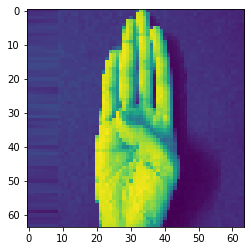

In [17]:
import numpy as np

from keras.preprocessing import image

test_image = image.load_img('D:/DATASET-20210424T052036Z-001/DATASET/TEST/B/B0.png', target_size = (64,64),color_mode = "grayscale")

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = new_model.predict(test_image)

a=result.argmax()
print(a)
s=validation_generator.class_indices

print(s)

name=[]

for i in s:

    name.append(i)

for i in range(len(s)):

    if(i==a):

        q=name[i]

print(q)

In [8]:
model = new_model.predict()

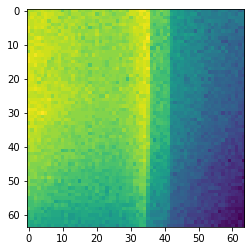

In [19]:
from keras.preprocessing import image
import cv2
import operator
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Got this from collect-data.py
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (64, 64)) 
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    #_, test_image = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    test_image = image.img_to_array(roi)

    test_image1 = np.expand_dims(test_image, axis = 0)
    #test_image2 = image.array_to_img(test_image1)
    #cv2.imshow("test1",test_image1)
    cv2.imshow("test", roi)
    #plt.imshow(roi)
    # Batch of 1
    result = new_model.predict(test_image1)
    a=result.argmax()
    #print(a)
    s=validation_generator.class_indices

    #print(s)

    name=[]

    for i in s:

        name.append(i)

    for i in range(len(s)):

        if(i==a):

            q=name[i]

    #print(q)
    
    prediction = {'A': result[0][0], 
                  'AA': result[0][1],
                  'AE': result[0][2],
                  'AIE': result[0][3],
                  'AU': result[0][4],
                  'B': result[0][5],
                  'BH': result[0][6],
                  'C': result[0][7],
                  'CHH': result[0][8],
                  'D': result[0][9],
                  'DD': result[0][10],
                  'DH': result[0][11],
                  'DHH': result[0][12],
                  'DHNY': result[0][13],
                  'E': result[0][14],
                  'EE': result[0][15],
                  'F': result[0][16],
                  'G': result[0][17],
                  'GH': result[0][18],
                  'H': result[0][19],
                  'J': result[0][20],
                  'JH': result[0][21],
                  'K': result[0][22],
                  'KH': result[0][23],
                  'KSH': result[0][24],
                  'L': result[0][25],
                  'LL': result[0][26],
                  'M': result[0][27],
                  'N': result[0][28],
                  'NN': result[0][29],
                  'O': result[0][30],
                  'P': result[0][31],
                  'R': result[0][32],
                  'S': result[0][33],
                  'SH': result[0][34],
                  'T': result[0][35],
                  'TH': result[0][36],
                  'THH': result[0][37],
                  'TT': result[0][38],
                  'U': result[0][39],
                  'UU': result[0][40],
                  'V': result[0][41],
                  'Y': result[0][42]}
                  
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1))
    #max_key = max(prediction, key=prediction.get)
    # Displaying the predictions
    cv2.putText(frame, q, (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)    
    cv2.imshow("Frame", frame)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
        

cap.release()
cv2.destroyAllWindows()